# Lectura y graficación de una señal almacenada en un archivo txt

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, iirnotch, filtfilt
from sklearn.linear_model import LinearRegression

## Leemos el archivo

In [17]:
def map_v(value, in_min, in_max, out_min, out_max):
    return (value - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

Ts = 1/250
Fs = 1/Ts
'''
OpenBCI
'''
adr = 'Imagenes/'
file = 'OpenBCI'
array = np.genfromtxt(file + ".txt", delimiter=",",skip_header = 5)
chs = np.transpose(array[:,1:9])
ch0 = chs[0,:]
ch1 = chs[1,:]
ch2 = chs[2,:]
ch3 = chs[3,:]
ch4 = chs[4,:]
ch5 = chs[5,:]
ch6 = chs[6,:]
ch7 = chs[7,:]
t = np.arange(len(ch0))*Ts
print('Seconds: ',len(t)*Ts)
len(ch0)

Seconds:  262.144


65536

In [18]:
import numpy as np
from scipy.signal import butter, filtfilt

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Parámetros del filtro
lowcut = 0.8
highcut = 48

# Filtrar datos
f0 = 60.0
b,c = iirnotch(f0, 30.0, 250.0)
ch0 = butter_bandpass_filter(ch0, lowcut, highcut, Fs)
ch1 = butter_bandpass_filter(ch1, lowcut, highcut, Fs)
ch2 = butter_bandpass_filter(ch2, lowcut, highcut, Fs)
ch3 = butter_bandpass_filter(ch3, lowcut, highcut, Fs)
ch4 = butter_bandpass_filter(ch4, lowcut, highcut, Fs)
ch5 = butter_bandpass_filter(ch5, lowcut, highcut, Fs)
ch6 = butter_bandpass_filter(ch6, lowcut, highcut, Fs)
ch7 = butter_bandpass_filter(ch7, lowcut, highcut, Fs)


plots = [ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7]


ch0 = filtfilt(b, c, ch0)
ch1 = filtfilt(b, c, ch1)
ch2 = filtfilt(b, c, ch2)
ch3 = filtfilt(b, c, ch3)
ch4 = filtfilt(b, c, ch4)
ch5 = filtfilt(b, c, ch5)
ch6 = filtfilt(b, c, ch6)
ch7 = filtfilt(b, c, ch7)



In [19]:
'''
modelo = LinearRegression()

modelo.fit(t.reshape(-1, 1), ch0.reshape(-1, 1))
tendencia_lineal = modelo.predict(t.reshape(-1, 1))
ch0 = ch0 - tendencia_lineal.ravel()

modelo.fit(t.reshape(-1, 1), ch1.reshape(-1, 1))
tendencia_lineal = modelo.predict(t.reshape(-1, 1))
ch1 = ch1 - tendencia_lineal.ravel()

modelo.fit(t.reshape(-1, 1), ch2.reshape(-1, 1))
tendencia_lineal = modelo.predict(t.reshape(-1, 1))
ch2 = ch2 - tendencia_lineal.ravel()

modelo.fit(t.reshape(-1, 1), ch3.reshape(-1, 1))
tendencia_lineal = modelo.predict(t.reshape(-1, 1))
ch3 = ch3 - tendencia_lineal.ravel()

modelo.fit(t.reshape(-1, 1), ch4.reshape(-1, 1))
tendencia_lineal = modelo.predict(t.reshape(-1, 1))
ch4 = ch4 - tendencia_lineal.ravel()

modelo.fit(t.reshape(-1, 1), ch5.reshape(-1, 1))
tendencia_lineal = modelo.predict(t.reshape(-1, 1))
ch5 = ch5 - tendencia_lineal.ravel()

modelo.fit(t.reshape(-1, 1), ch6.reshape(-1, 1))
tendencia_lineal = modelo.predict(t.reshape(-1, 1))
ch6 = ch6 - tendencia_lineal.ravel()

modelo.fit(t.reshape(-1, 1), ch7.reshape(-1, 1))
tendencia_lineal = modelo.predict(t.reshape(-1, 1))
ch7 = ch7 - tendencia_lineal.ravel()
'''

'\nmodelo = LinearRegression()\n\nmodelo.fit(t.reshape(-1, 1), ch0.reshape(-1, 1))\ntendencia_lineal = modelo.predict(t.reshape(-1, 1))\nch0 = ch0 - tendencia_lineal.ravel()\n\nmodelo.fit(t.reshape(-1, 1), ch1.reshape(-1, 1))\ntendencia_lineal = modelo.predict(t.reshape(-1, 1))\nch1 = ch1 - tendencia_lineal.ravel()\n\nmodelo.fit(t.reshape(-1, 1), ch2.reshape(-1, 1))\ntendencia_lineal = modelo.predict(t.reshape(-1, 1))\nch2 = ch2 - tendencia_lineal.ravel()\n\nmodelo.fit(t.reshape(-1, 1), ch3.reshape(-1, 1))\ntendencia_lineal = modelo.predict(t.reshape(-1, 1))\nch3 = ch3 - tendencia_lineal.ravel()\n\nmodelo.fit(t.reshape(-1, 1), ch4.reshape(-1, 1))\ntendencia_lineal = modelo.predict(t.reshape(-1, 1))\nch4 = ch4 - tendencia_lineal.ravel()\n\nmodelo.fit(t.reshape(-1, 1), ch5.reshape(-1, 1))\ntendencia_lineal = modelo.predict(t.reshape(-1, 1))\nch5 = ch5 - tendencia_lineal.ravel()\n\nmodelo.fit(t.reshape(-1, 1), ch6.reshape(-1, 1))\ntendencia_lineal = modelo.predict(t.reshape(-1, 1))\nch6 =

## Ploteamos la lectura

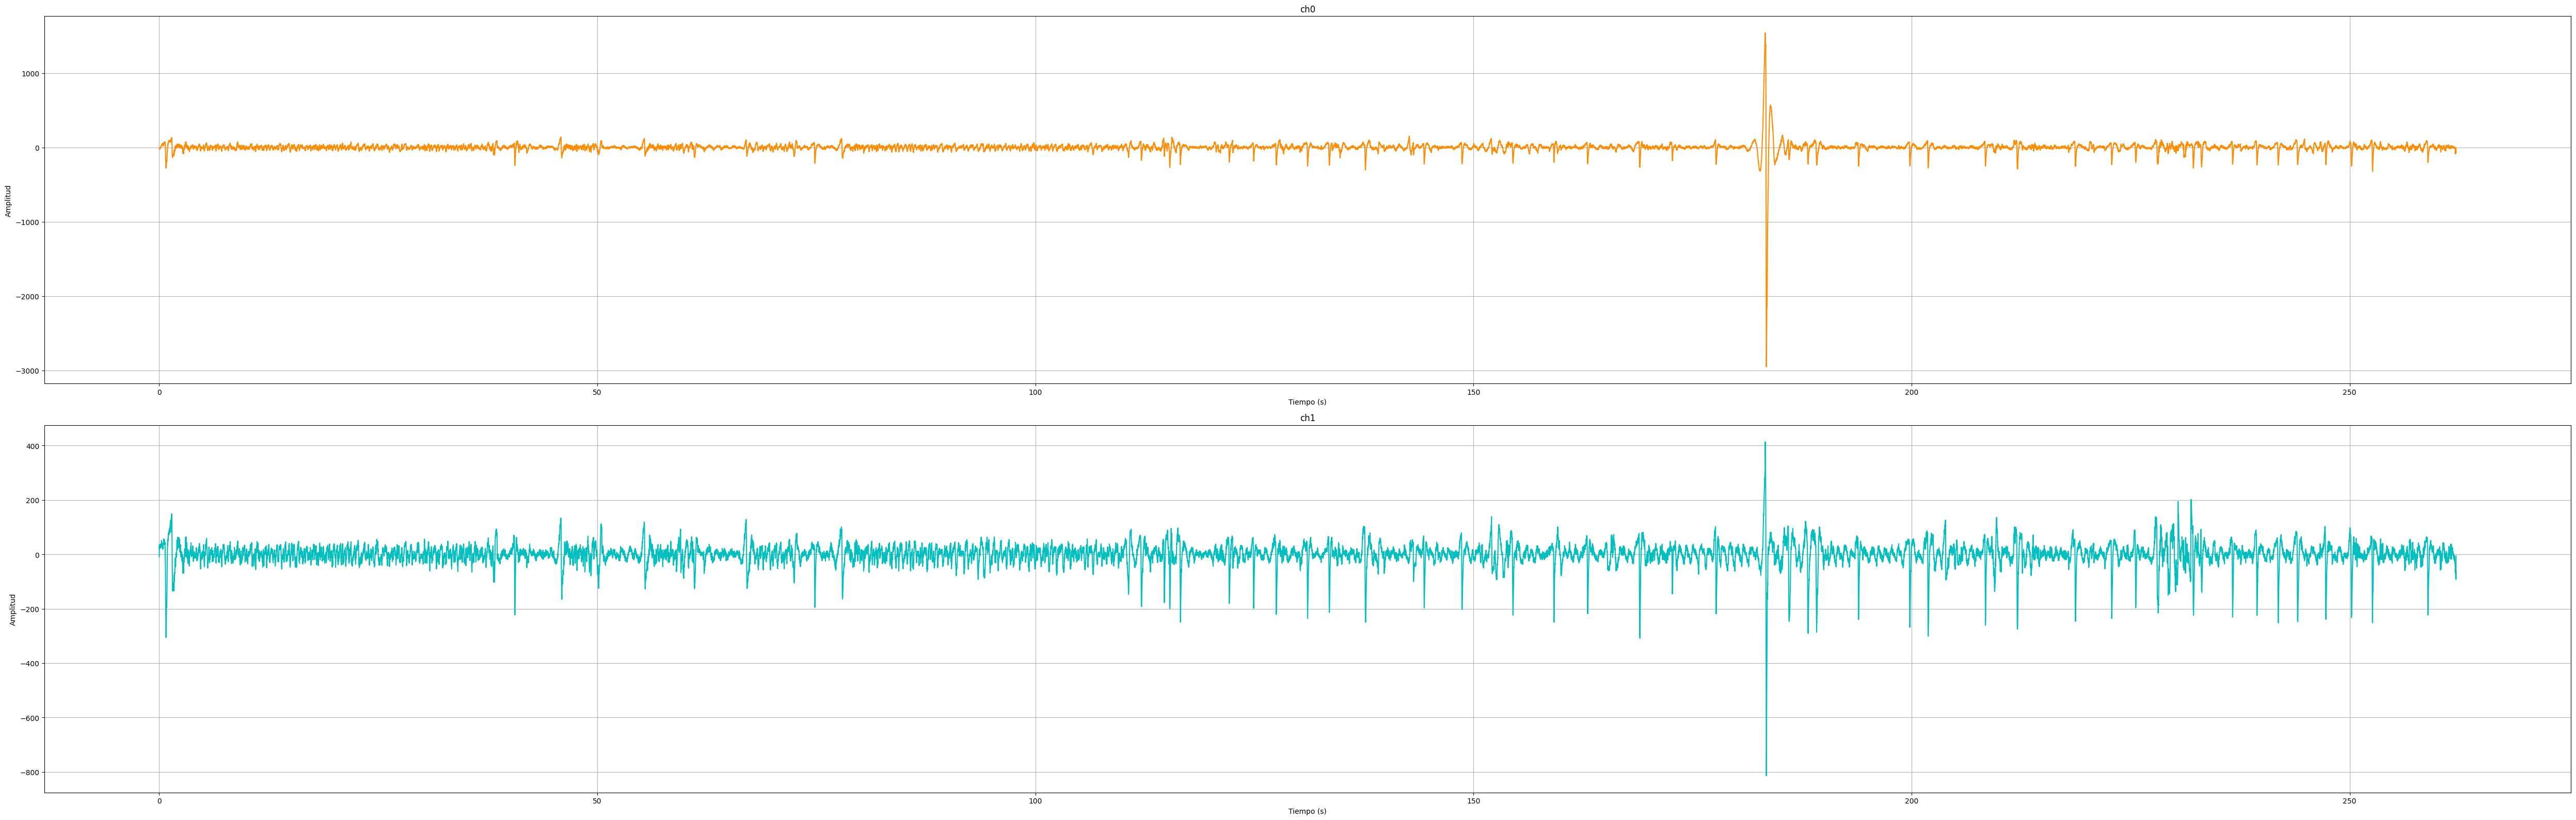

In [20]:
colors = ['r', 'g', 'b', '#B0C4DE','m','#FF6347','#FF8C00','c']
a = 0
plots = [ch0,ch1]
fig, axs = plt.subplots(len(plots), 1, figsize=(50,16))
b = 6
for i in plots:
    co = colors[b]
    axs[a].plot(t,i,co); axs[a].grid(True); axs[a].set(title = 'ch' + str(a), xlabel = 'Tiempo (s)', ylabel = 'Amplitud')
    a += 1
    b += 1
plt.tight_layout()
plt.show()

In [21]:
f0 = 60.0
b,a = iirnotch(f0, 30.0, 1000.0)
signal1 = filtfilt(b, a, ch0)
signal1,ch0

(array([-11.52562757, -13.39042912, -13.81033019, ..., -74.32026287,
        -54.48857436,  -6.47703702]),
 array([-11.56500688, -13.2915102 , -13.5855171 , ..., -78.30259751,
        -57.94046456,  -8.89945929]))

## La forma de saber la frecuencia de la señal es viendo en el dominio de la frecuencia

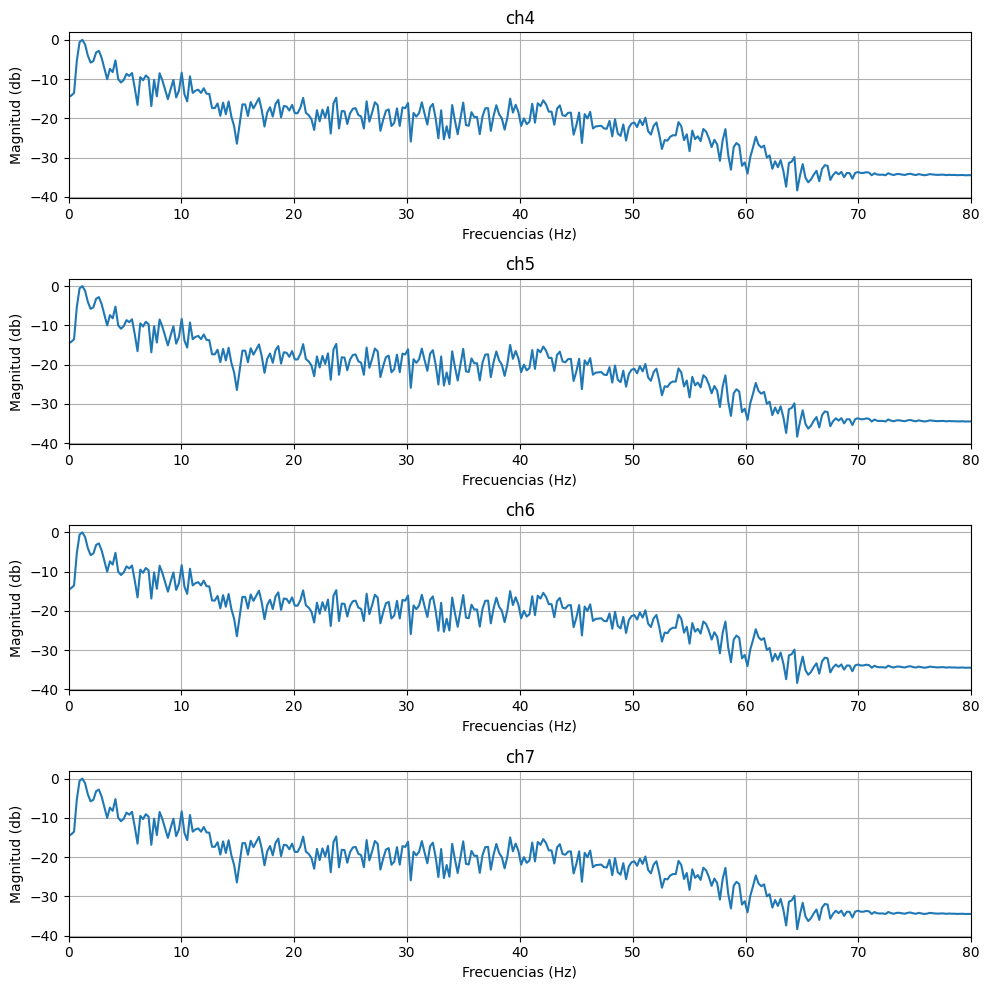

In [22]:
N = 2**10                                     # 10 bits, 0-1023
a = 0
plots = [ch4,ch5,ch6,ch7]
fig, axs = plt.subplots(len(plots), 1, figsize=(10,10))
for i in plots:
    signla1 = i
    signal_fft = np.fft.fft(signal1, N)           # fft magtinud
    signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
    signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

    with np.errstate(divide='ignore'):
        signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

    F_list = np.linspace(0,Fs/2, N//2)
    F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array
    axs[a].plot(F_list, signal_fft_db); axs[a].grid(True); axs[a].set(title = 'ch' + str(a+4), xlabel = 'Frecuencias (Hz)', ylabel = 'Magnitud (db)',xlim = (0,80))
    a += 1
plt.tight_layout()
plt.show()


In [23]:
# Ffig.savefig(adr + file + ' Freq_response.png')
# fig.savefig(adr + file + ' Raw_Signal.png')
# f.savefig(adr + file + ' Filtered_Signal.png')